In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, copy
from pathlib import Path

%load_ext autoreload
%autoreload 2

THIS_PATH = Path(os.path.abspath(''))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [5, 2.5]
plt.rcParams['figure.autolayout'] = True
mpl.rcParams.update({'axes.grid': True})

In [22]:
from em.signal_utils import gen_ir
%matplotlib qt
toas_gt = np.array([134.221, 143.1, 202.01, 240.9])
gains_gt = np.array([1., .5, .4, .35])
fdflen = 41
ir_gt = gen_ir(int(toas_gt.max()+100), toas_gt, gains_gt, fdflen)
N = ir_gt.shape[0]
plt.plot(ir_gt)
plt.show()

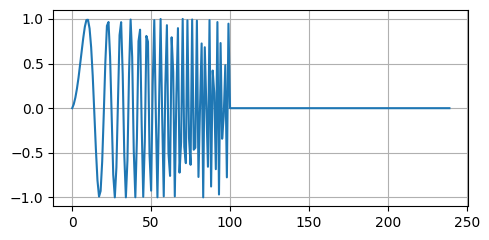

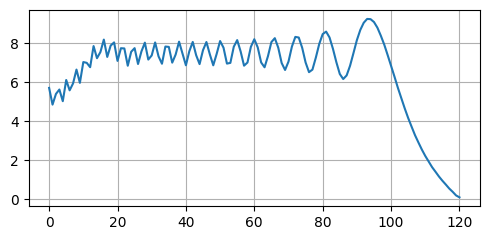

In [6]:
from em.signal_utils import gen_chirp
from numpy.fft import fft, rfft, ifft, irfft, fftfreq, rfftfreq
%matplotlib inline
f0 = 0.5 / 100
f1 = 0.45
chp_len = 100
chp_signal = gen_chirp(f0, f1, chp_len, len(ir_gt) - chp_len)
chp_signal_fft = rfft(chp_signal)
plt.plot(chp_signal)
plt.show()
plt.plot(np.abs(chp_signal_fft))
plt.show()

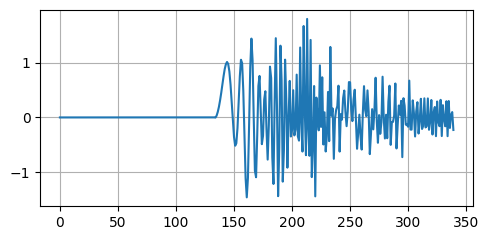

In [7]:
src_signal = np.convolve(ir_gt, chp_signal, mode='full')[:N]
plt.plot(src_signal)
plt.show()

In [19]:
from em.signal_utils import add_white_noise
%matplotlib qt
snrs = [40, 20, 10, 0, -10]
fig, axs = plt.subplots(len(snrs)+1, 1, sharex=True)
axs[0].plot(ir_gt)
for i, snr in enumerate(snrs):
    noisy_signal = add_white_noise(src_signal, snr)
    ir = irfft(rfft(noisy_signal) / chp_signal_fft)
    axs[i+1].plot(ir)
    axs[i+1].set_title(f'SNR: {snr} dB')

plt.show()  

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\ipykernel\eventloops.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  el.exec() if hasattr(el, 'exec') else el.exec_()


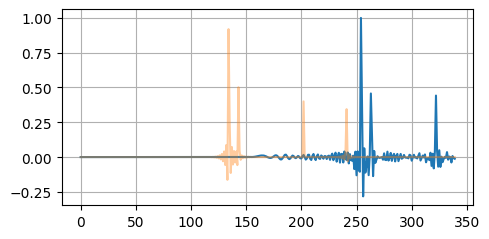

In [18]:
t = np.correlate(src_signal, chp_signal, mode='same')
plt.plot(t / np.max(t))
plt.plot(ir_gt, alpha=0.4)